# Tube Finder

This notebook logs our efforts towards making a 2-tube model that best approximates Jacob's voice. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile

## Target Waveform: Sanity Check

First, let's load our test subject's recording and verify the spectrogram looks normal. 
This is our "target" waveform -- our model is aiming to produce a similar sound.

In [2]:
sampling_rate, target_waveform = wavfile.read('target_sounds/jacob-aah-1.wav')

# This is a stereo wav. Take only the first audio track. 
target_waveform = target_waveform[:,0]

Text(0, 0.5, 'Frequency (Hz)')

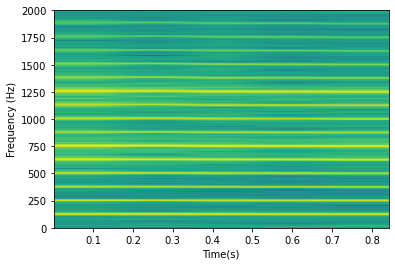

In [3]:
# Visualize the vocal spectrogram. 
_, _, _, _ = plt.specgram(target_waveform, Fs=sampling_rate, NFFT=8192)
plt.ylim([0,2000])
plt.xlabel('Time(s)')
plt.ylabel('Frequency (Hz)')

Looking good! Let's narrow our data down a bit, just to avoid any "quiet spots" near the beginning or end of the track. 

In [4]:
target_waveform = target_waveform[round(0.05 * len(target_waveform)) : round(0.95 * len(target_waveform))]
print(target_waveform.shape)

(43632,)


## Optimizing The Generated Waveform

We've already implemented the optimizer in `n_tube_optimizer.py`. Let's look through what it can give us. 

In [5]:
import n_tube_optimizer as nto
import metrics

/usr/lib/python3.9/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


We got a warning -- our installation of `tslearn` doesn't support en-masse data storage, because `h5py` isn't installed. This doesn't affect what we're doing now, so we can ignore it. 

In [6]:
tubes_optimal = nto.find_optimal_parameters(target_waveform, metrics.mse_loss, 10_000)

/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


TypeError: only length-1 arrays can be converted to Python scalars